In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("AirPassengers.csv")  # Make sure the file is in your working directory
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [23]:
# Convert to proper datetime - handles the date format correctly
data['Month'] = pd.to_datetime(data['Month'])

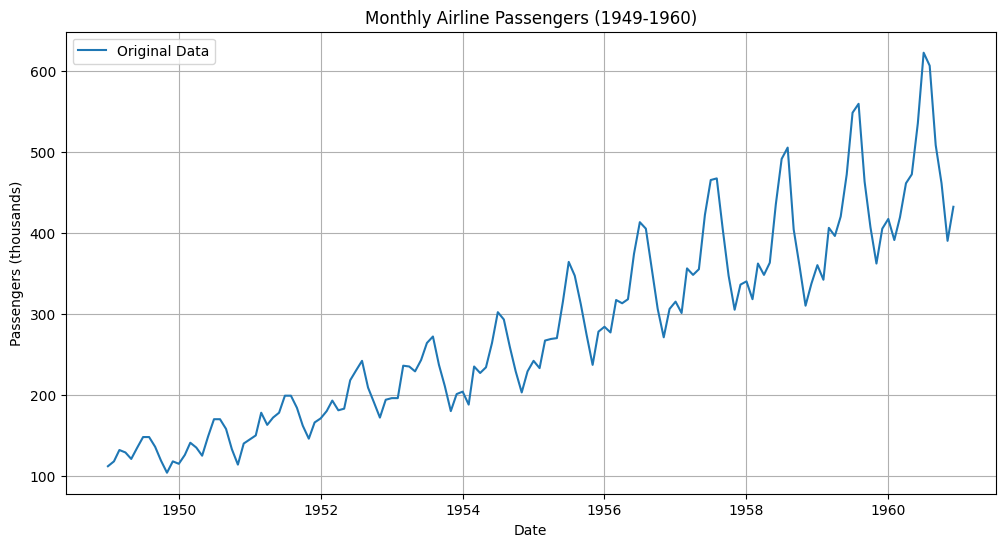

In [27]:
data.set_index('Month', inplace=True)
data = data[['#Passengers']]

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Model 1: Local Level Model (Random Walk)
model_ll = UnobservedComponents(data['#Passengers'], 'llevel')
res_ll = model_ll.fit()
res_ll.summary()

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                    local level   Log Likelihood                -705.955
Date:                Tue, 06 May 2025   AIC                           1415.909
Time:                        11:14:33   BIC                           1421.835
Sample:                    01-01-1949   HQIC                          1418.317
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.312e-07     85.482   1.53e-09      1.000    -167.542     167.542
sigma2.level      1136.4043    176.695      6.431      0.000     790.088    1482.721
===================================================================================
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               9.22   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
# Model 2: Local Linear Trend
model_lt = UnobservedComponents(data['#Passengers'], 'lltrend')
res_lt = model_lt.fit()
res_lt.summary()

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:             local linear trend   Log Likelihood                -703.683
Date:                Tue, 06 May 2025   AIC                           1413.367
Time:                        11:14:33   BIC                           1422.234
Sample:                    01-01-1949   HQIC                          1416.970
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   6.44e-10     93.928   6.86e-12      1.000    -184.096     184.096
sigma2.level      1139.3642    175.632      6.487      0.000     795.132    1483.596
sigma2.trend      1.361e-10      1.346   1.01e-10      1.000      -2.639       2.639
===================================================================================
Ljung-Box (L1) (Q):                  13.33   Jarque-Bera (JB):                 5.23
Prob(Q):                              0.00   Prob(JB):                         0.07
Heteroskedasticity (H):               9.30   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
# Model 3: Local Linear Trend with Seasonal (12 months)
model_seas = UnobservedComponents(data['#Passengers'], 'lltrend', seasonal=12)
res_seas = model_seas.fit()
res_seas.summary()

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                    local linear trend   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1140.103
Date:                       Tue, 06 May 2025   BIC                           1151.603
Time:                               11:14:34   HQIC                          1144.776
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  8.552e-09     19.504   4.38e-10      1.000     -38.226      38.226
sigma2.level       161.5596     34.663      4.661      0.000      93.622     229.498
sigma2.trend      5.742e-09      0.095   6.02e-08      1.000      -0.187       0.187
sigma2.seasonal     18.8405      6.519      2.890      0.004       6.063      31.618
===================================================================================
Ljung-Box (L1) (Q):                  27.14   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               9.84   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
# Model 4: Trigonometric Seasonal
model_trig = UnobservedComponents(data['#Passengers'], 'lltrend', seasonal=12, 
                                stochastic_seasonal=True)
res_trig = model_trig.fit()
res_trig.summary()

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                    local linear trend   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1140.103
Date:                       Tue, 06 May 2025   BIC                           1151.603
Time:                               11:14:43   HQIC                          1144.776
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  8.552e-09     19.504   4.38e-10      1.000     -38.226      38.226
sigma2.level       161.5596     34.663      4.661      0.000      93.622     229.498
sigma2.trend      5.742e-09      0.095   6.02e-08      1.000      -0.187       0.187
sigma2.seasonal     18.8405      6.519      2.890      0.004       6.063      31.618
===================================================================================
Ljung-Box (L1) (Q):                  27.14   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               9.84   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

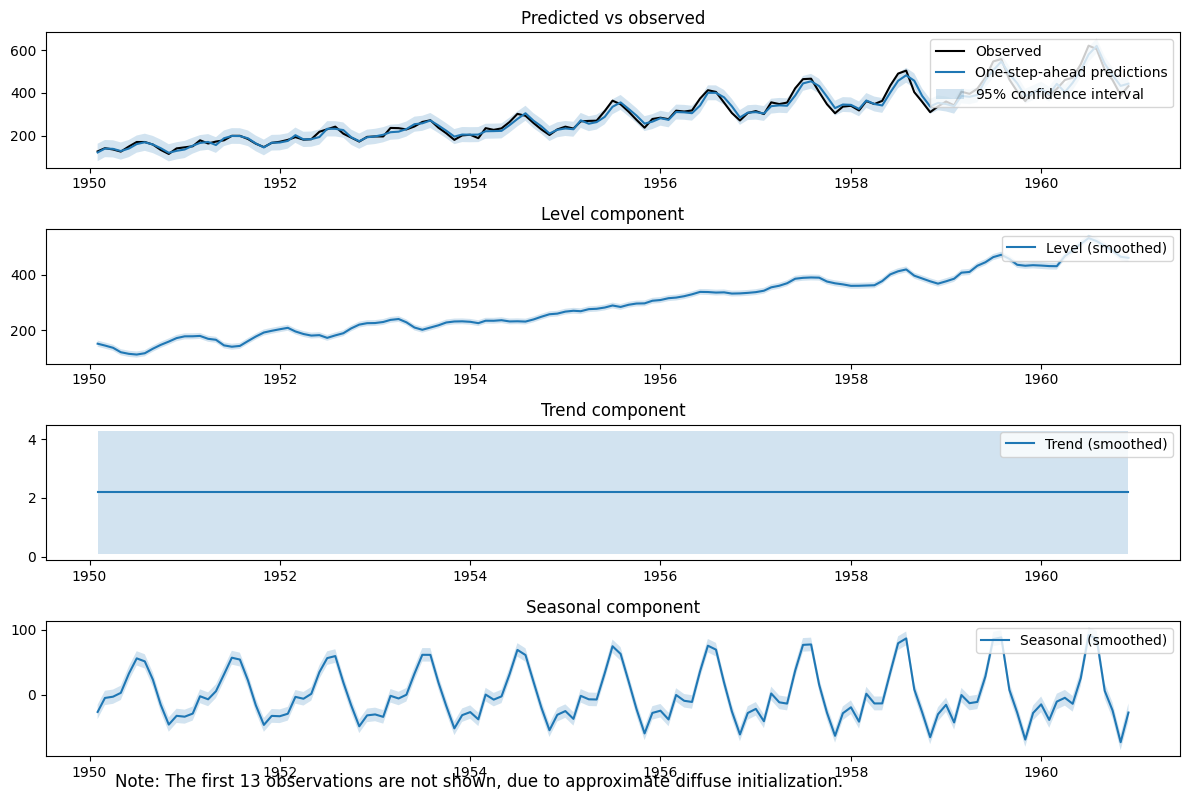

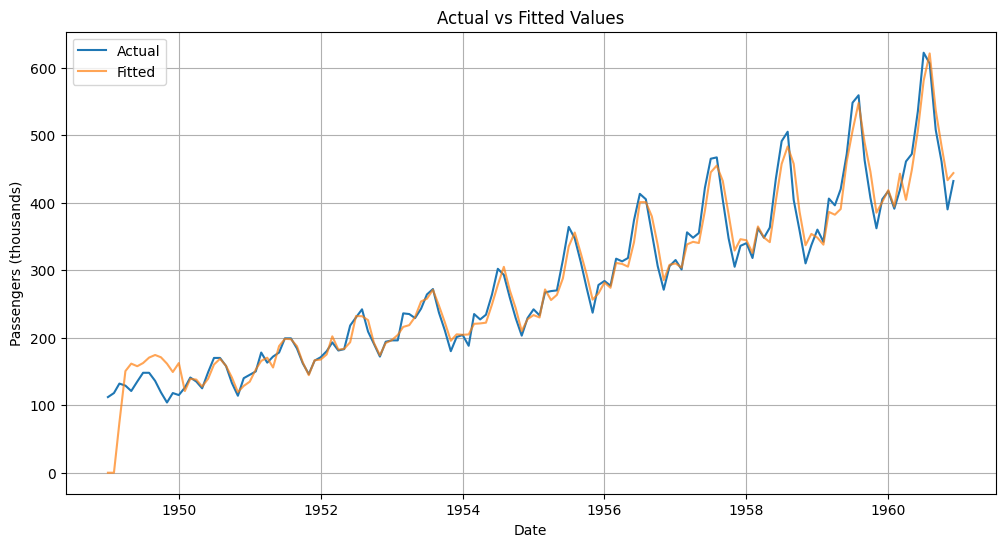

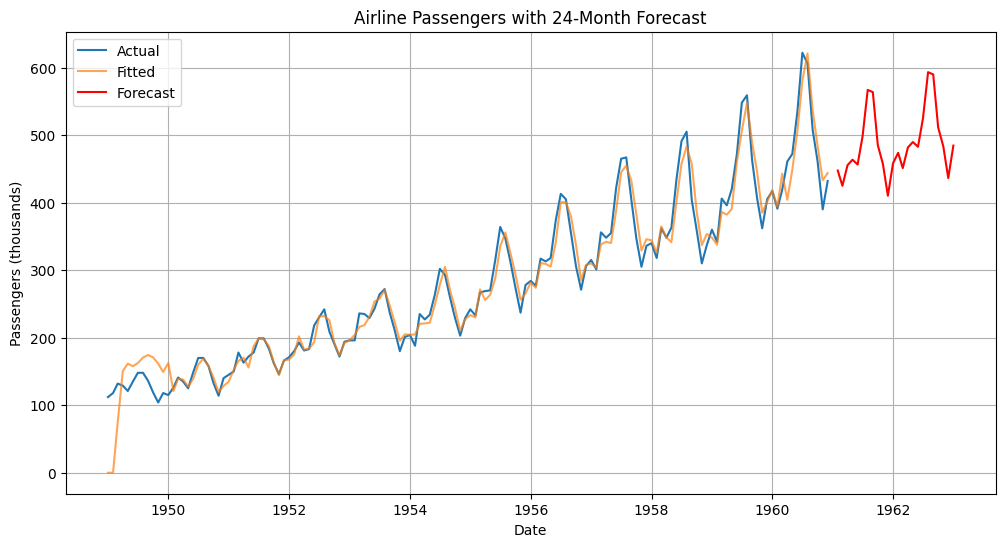

In [67]:
# Plot the components of the best model (Model 4)
fig = res_seas.plot_components(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot the fitted values vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Actual')
plt.plot(data.index, res_trig.fittedvalues, label='Fitted', alpha=0.7)
plt.title('Actual vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

# Forecast the next 24 months
forecast_steps = 24
forecast = res_seas.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps+1, freq='ME')[1:]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Actual')
plt.plot(data.index, res_trig.fittedvalues, label='Fitted', alpha=0.7)
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.title('Airline Passengers with 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Compare models using AIC
models = {
    'Local Level': res_ll,
    'Local Trend': res_lt,
    'Local Trend + Seasonal': res_seas,
    'Local Trend + Stochastic Seasonal': res_trig
}

comparison = pd.DataFrame({
    'Model': models.keys(),
    'AIC': [m.aic for m in models.values()],
    'BIC': [m.bic for m in models.values()],
    'Log-Likelihood': [m.llf for m in models.values()]
}).sort_values('AIC')

print(comparison)

                               Model          AIC          BIC  Log-Likelihood
2             Local Trend + Seasonal  1140.102616  1151.603405     -566.051308
3  Local Trend + Stochastic Seasonal  1140.102616  1151.603405     -566.051308
1                        Local Trend  1413.366691  1422.234172     -703.683345
0                        Local Level  1415.909117  1421.834807     -705.954559
